#**Naive-Bayes-Learining-Sample**

In [24]:
#Import Libraries file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #Train Test Split

from sklearn.naive_bayes import GaussianNB   # Naive Bayes Classifier

from sklearn import preprocessing            # Label Encoder

from sklearn.neighbors import KNeighborsClassifier  # KNN Classsifiers

In [16]:

#Read CSV File

df1 =pd.read_csv('/content/Iris_Data.csv')

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Cleaning


In [18]:

df1.duplicated().sum()


3

In [19]:
df1.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df1.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [22]:
df1.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **Data Visualization:**
Explore relationships between variables using plots such as scatter plots, pair plots, and histograms.

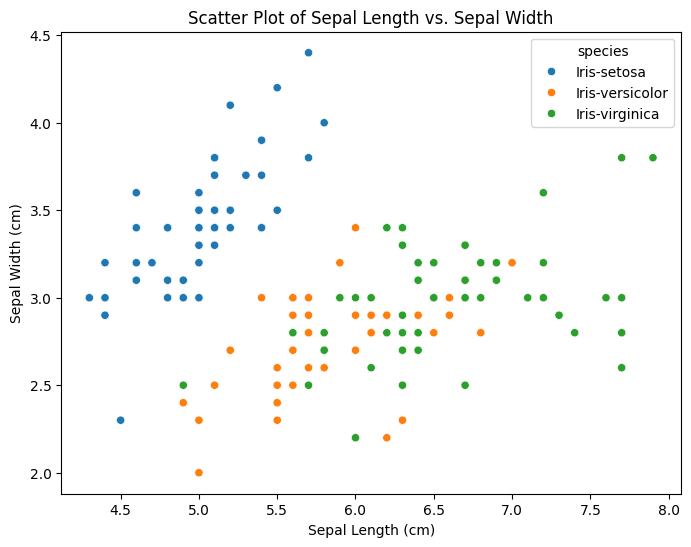

In [25]:
# Scatter plot of sepal length vs. sepal width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df1)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

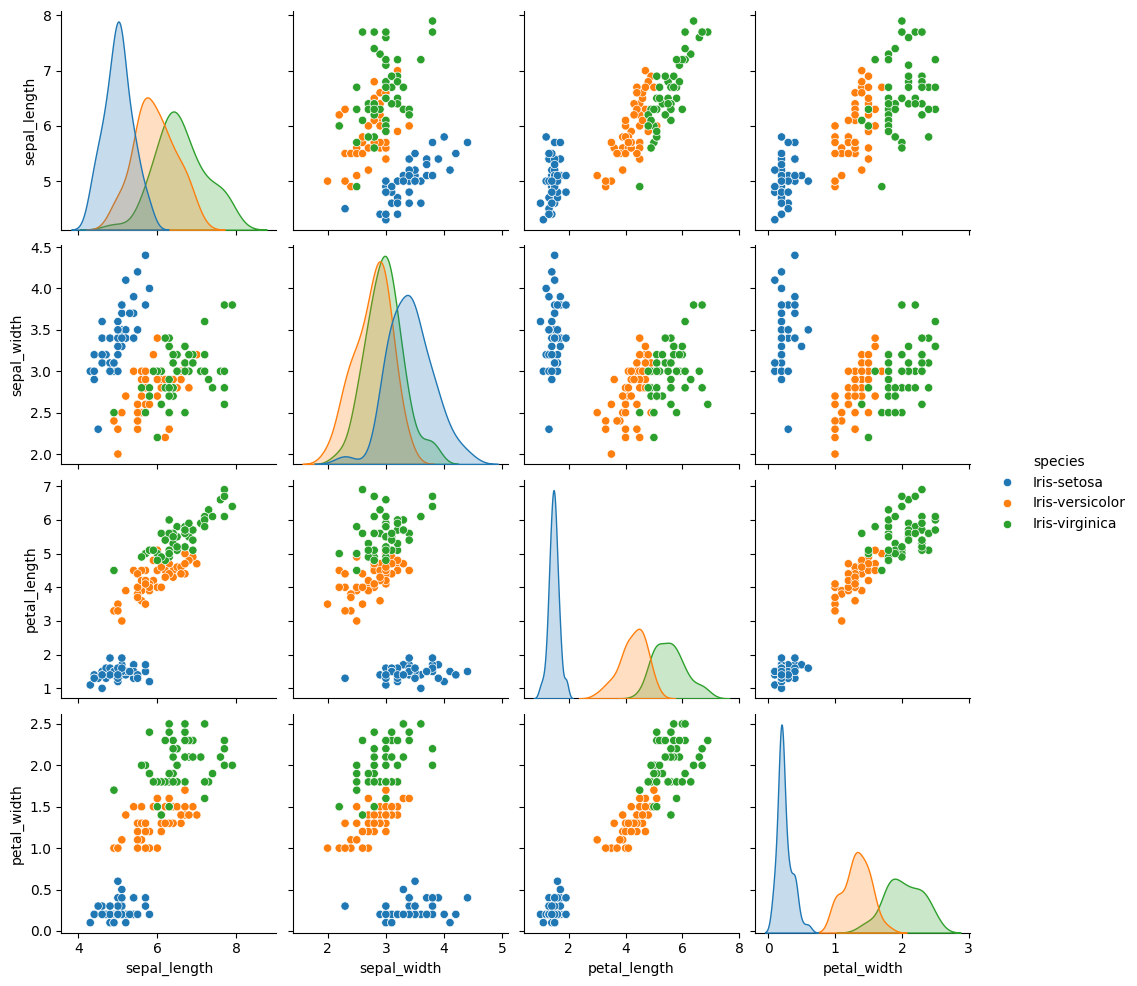

In [26]:
# Pair plot of all numerical variables, colored by species
sns.pairplot(df1, hue='species')
plt.show()

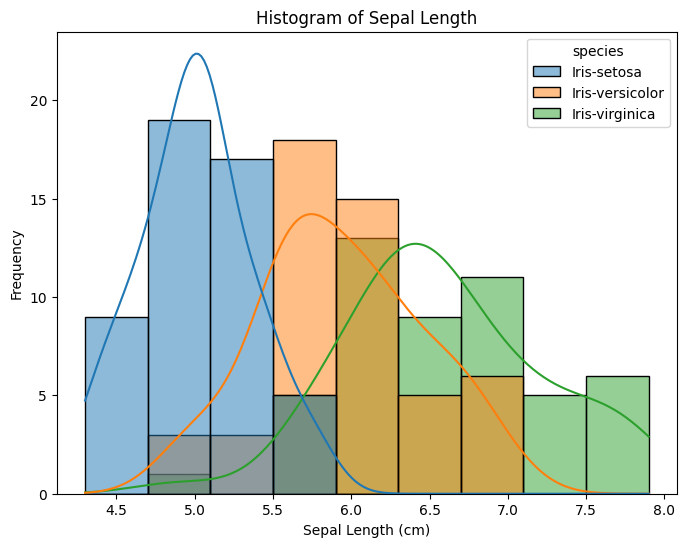

In [27]:
# Histogram of sepal length, colored by species
plt.figure(figsize=(8, 6))
sns.histplot(x='sepal_length', hue='species', data=df1, kde=True)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

## Class Distribution

>  Check the distribution of the target variable (species).



species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


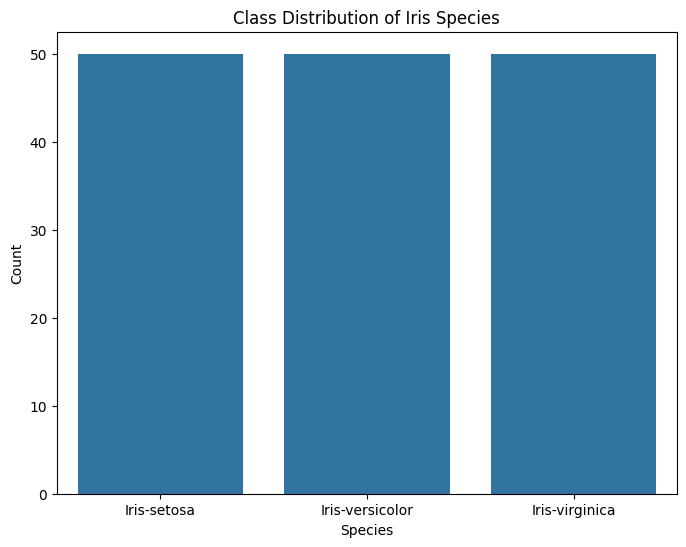

In [28]:
# Count the occurrences of each species
species_counts = df1['species'].value_counts()

# Print the counts
print(species_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df1)
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Appling Label Incoder

In [30]:


label_encoder = preprocessing.LabelEncoder()
df1['species']=label_encoder.fit_transform(df1['species'])

df1['species'].unique()

array([0, 1, 2])

##**Correlation Analysis:**
Compute and visualize correlations between numerical features.

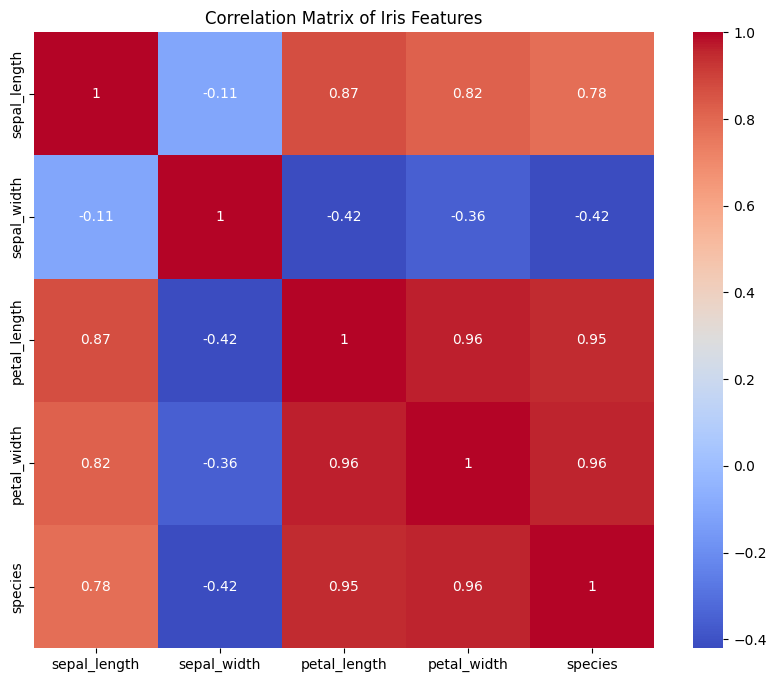

In [31]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()

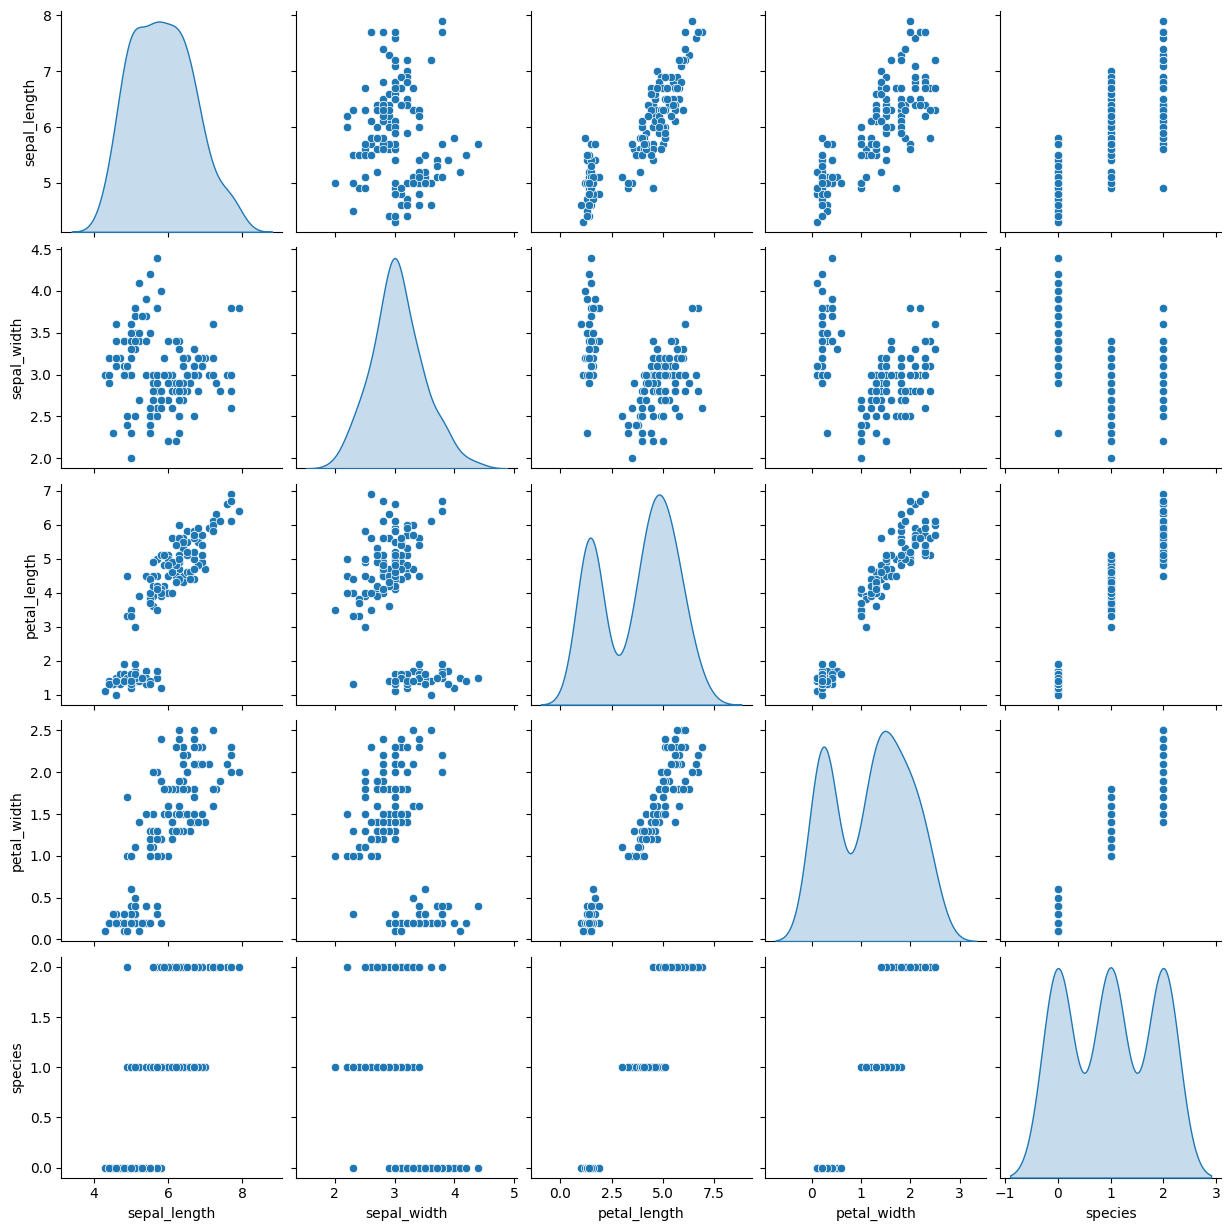

In [32]:
sns.pairplot(df1, diag_kind='kde')

## Train Test split

In [34]:
x = df1.drop(['species'], axis=1)  # Remove 'species' column and get the data
y = df1['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

x_train.shape

(105, 4)

### **Naive Bayes model**

In [35]:
Naive_bayes = GaussianNB()

Naive_bayes.fit(x_train,y_train)

GaussianNB()

In [36]:
y_pred = Naive_bayes.predict(x_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

###  Confusion Metrix

In [37]:

from sklearn import metrics

cnf_metrics = metrics.confusion_matrix(y_test,y_pred)
cnf_metrics

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

<Axes: >

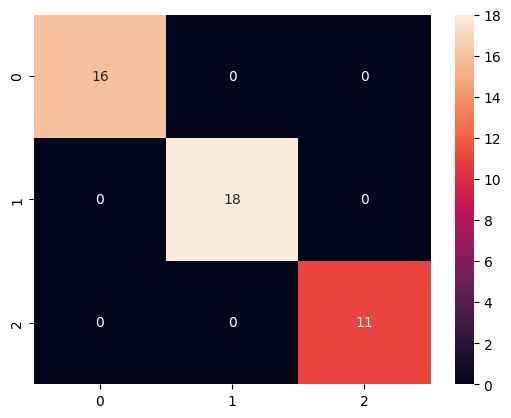

In [38]:
sns.heatmap(cnf_metrics,annot=True)

### Model accuracy

In [39]:
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0
